In [4]:
import json

from pathlib import Path

import pandas as pd
import numpy as np

import biopsykit as bp


from biopsykit.classification.model_selection import SklearnPipelinePermuter
import pepbench.plotting
#from src.pepbench.io import load_best_performing_algos_q_wave, load_preprocessed_training_data, get_best_pipeline_results, get_best_estimator, get_pipeline_steps
#from src.pepbench.io import compute_abs_error, compute_error

import pingouin as pg

import matplotlib.pyplot as plt

%matplotlib widget
%load_ext autoreload
%autoreload 2

In [8]:
model_path = Path("../../../../../../models")
data_path = Path("../../../results/data")
result_path = Path("../../../results")

In [9]:
input_data = pd.read_csv(data_path.joinpath("train_data_q_wave.csv"), index_col=[0,1,2,3,4])
input_data

,,,,,rr_interval_ms_estimated,forounzafar2018,martinez2004,scipy-findpeaks,vanlien2013-32-ms,vanlien2013-34-ms,vanlien2013-36-ms,vanlien2013-38-ms,vanlien2013-40-ms,vanlien2013-42-ms
,participant,phase,heartbeat_id_reference,q_wave_onset_sample_reference,,,,,,,,,,
0,GDN0005,HoldingBreath,0,260.0,850.0,276.0,262.0,262.0,266.0,264.0,262.0,260.0,258.0,256.0
1,GDN0005,HoldingBreath,1,260.0,778.0,278.0,262.0,262.0,266.0,264.0,262.0,260.0,258.0,256.0
2,GDN0005,HoldingBreath,3,222.0,746.0,236.0,224.0,224.0,230.0,228.0,226.0,224.0,222.0,220.0
3,GDN0005,HoldingBreath,4,220.0,766.0,236.0,222.0,222.0,230.0,228.0,226.0,224.0,222.0,220.0
4,GDN0005,HoldingBreath,5,228.0,790.0,242.0,230.0,230.0,236.0,234.0,232.0,230.0,228.0,226.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11498,VP_032,Talk,38,153.0,596.0,188.0,154.0,154.0,179.0,177.0,175.0,173.0,171.0,169.0
11499,VP_032,Talk,39,172.0,619.0,183.0,173.0,173.0,177.0,175.0,173.0,171.0,169.0,167.0
11500,VP_032,Talk,40,181.0,680.0,193.0,182.0,182.0,185.0,183.0,181.0,179.0,177.0,175.0


In [14]:
permuter1 = SklearnPipelinePermuter.from_pickle(model_path.joinpath("q-peak/without-rr-interval/q_peak_regression_hpc_0_baseline_result_median_imputed.pkl"))
permuter1.metric_summary()

true_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectFromModel     DecisionTreeRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    RandomForestRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    SVR                    [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    KNeighborsRegressor    [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                SelectKBest         DecisionTreeRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    RandomForestRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    SVR                    [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    KNeighborsRegressor    [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    RandomForestRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    SVR                    [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    KNeighborsRegressor    [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                SelectKBest         DecisionTreeRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    RandomForestRegressor  [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    SVR                    [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   
                                    KNeighborsRegressor    [260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...   

                                                                                           true_labels_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectFromModel     DecisionTreeRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    RandomForestRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    SVR                    [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    KNeighborsRegressor    [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                SelectKBest         DecisionTreeRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    RandomForestRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    SVR                    [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    KNeighborsRegressor    [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
MinMaxScaler    SelectFromModel     DecisionTreeRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    RandomForestRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    SVR                    [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    KNeighborsRegressor    [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                SelectKBest         DecisionTreeRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    RandomForestRegressor  [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    SVR                    [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   
                                    KNeighborsRegressor    [[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...   

                                                               

In [5]:
permuter1.best_estimator_summary()

AttributeError: 'Pipeline' object has no attribute 'transform_input'

AttributeError: 'Pipeline' object has no attribute 'transform_input'

In [6]:
permuter1.best_hyperparameter_pipeline()

C:\Users\sebas\Development\ResearchInternship\Code\BioPsyKit\src\biopsykit\classification\model_selection\sklearn_pipeline_permuter.py:680: FutureWarning: ['param_clf__weights', 'param_reduce_dim__score_func', 'params'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  .agg(["mean", "std"])


,mean_test_neg_mean_absolute_error,param_clf__n_neighbors,param_clf__p,param_clf__weights,param_reduce_dim__k,param_reduce_dim__score_func,params,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error
outer_fold,,,,,,,,,,,,,,
0,-2.392137,9,2,uniform,2.0,<function mutual_info_regression at 0x000001FF...,"{'clf__n_neighbors': 9, 'clf__p': 2, 'clf__wei...",1,-2.174515,-1.970822,-2.407368,-3.197111,-2.210872,0.425661
1,-2.288633,9,2,uniform,2.0,<function mutual_info_regression at 0x000001FF...,"{'clf__n_neighbors': 9, 'clf__p': 2, 'clf__wei...",2,-2.366696,-1.341163,-2.837310,-1.563128,-3.334869,0.751772
2,-2.941416,9,2,uniform,2.0,<function mutual_info_regression at 0x000001FF...,"{'clf__n_neighbors': 9, 'clf__p': 2, 'clf__wei...",10,-3.655621,-1.976491,-2.297041,-2.492424,-4.285502,0.879153
3,-2.701100,9,2,uniform,2.0,<function mutual_info_regression at 0x000001FF...,"{'clf__n_neighbors': 9, 'clf__p': 2, 'clf__wei...",1,-2.121732,-2.369963,-4.405215,-1.918746,-2.689846,0.890116
4,-2.759006,9,2,uniform,2.0,<function mutual_info_regression at 0x000001FF...,"{'clf__n_neighbors': 9, 'clf__p': 2, 'clf__wei...",4,-1.291368,-3.108694,-3.546798,-1.765273,-4.082898,1.061796


In [7]:
best_algo = get_best_pipeline_results(permuter1, metric="mean_absolute_error")
best_algo

,,,true_labels,true_labels_folds,predicted_labels,predicted_labels_folds,train_indices,train_indices_folds,test_indices,test_indices_folds,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,test_neg_mean_absolute_error_fold_0,test_neg_mean_absolute_error_fold_1,test_neg_mean_absolute_error_fold_2,test_neg_mean_absolute_error_fold_3,test_neg_mean_absolute_error_fold_4
MinMaxScaler,SelectKBest,KNeighborsRegressor,"[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 226...","[[260.0, 260.0, 222.0, 220.0, 228.0, 236.0, 22...","[263.0, 264.77777777777777, 224.44444444444446...","[[263.0, 264.77777777777777, 224.4444444444444...","[316, 317, 318, 319, 320, 321, 322, 323, 324, ...","[[316, 317, 318, 319, 320, 321, 322, 323, 324,...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...",2.515338,0.60267,2.981635,3.469856,1.965722,2.025227,2.134249


In [8]:
best_estimator, _ = get_best_estimator(permuter1, metric="mean_absolute_error")

In [56]:
best_estimator

AttributeError: 'Pipeline' object has no attribute 'transform_input'

In [10]:
get_pipeline_steps(permuter1, input_data=input_data, metric="mean_absolute_error", step="reduce_dim", scaler=True)

[['forounzafar2018', 'martinez2004'],
 ['forounzafar2018', 'martinez2004'],
 ['forounzafar2018', 'martinez2004'],
 ['forounzafar2018', 'martinez2004'],
 ['forounzafar2018', 'martinez2004']]

In [11]:
reference_labels = best_algo["true_labels"].values[0]
reference_labels

array([260., 260., 222., ..., 207., 214., 227.])

In [12]:
best_algo["predicted_labels"].values[0]

array([263.        , 264.77777778, 224.44444444, ..., 199.875     ,
       213.        , 228.        ])

In [13]:
abs_error_estimator = np.abs(best_algo["predicted_labels"].values[0] - reference_labels)
abs_error_estimator

array([3.        , 4.77777778, 2.44444444, ..., 7.125     , 1.        ,
       1.        ])

In [14]:
np.mean(abs_error_estimator)

2.519515564618658

### Load predictions of the n best performing traditional algorithms on the empkins and guardian dataset

In [41]:
best_algos_empkins = load_best_performing_algos_q_wave(result_path.joinpath("empkins_dataset_reference_b_point").resolve(), n_best=8)
best_algos_empkins

,mean,std
q_wave_algorithm,,
vanlien2013-34-ms,5.195722,3.434739
vanlien2013-36-ms,5.432358,4.159658
martinez2004,5.439458,5.928151
vanlien2013-32-ms,5.470322,2.877675
vanlien2013-38-ms,6.464106,4.622118
vanlien2013-40-ms,7.932415,5.014730
vanlien2013-42-ms,9.698667,5.259776
forounzafar2018,11.706619,4.045189


In [40]:
best_algos_guardian = load_best_performing_algos_q_wave(result_path.joinpath("guardian_dataset_reference_b_point").resolve(), n_best=8)
best_algos_guardian

,mean,std
q_wave_algorithm,,
martinez2004,4.326607,9.754697
vanlien2013-32-ms,4.742027,3.780616
vanlien2013-34-ms,4.855155,4.202830
vanlien2013-36-ms,5.500321,4.822258
vanlien2013-38-ms,6.725974,5.370435
vanlien2013-40-ms,8.431691,5.656075
forounzafar2018,10.068229,2.879916
vanlien2013-42-ms,10.388573,5.687563


In [42]:
data_best_algos_empkins = load_preprocessed_training_data(data_path.joinpath("train_data_q_wave.csv"), algorithms=best_algos_empkins.index, include_reference=True, event='q_wave')
data_best_algos_guardian = load_preprocessed_training_data(data_path.joinpath("train_data_q_wave.csv"), algorithms=best_algos_guardian.index, include_reference=True, event='q_wave')

In [43]:
abs_error_empkins = compute_abs_error(data_best_algos_empkins, data_best_algos_empkins["q_wave_onset_sample_reference"])
abs_error_empkins

vanlien2013-34-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     4.0   
                          1                                     4.0   
                          3                                     6.0   
                          4                                     8.0   
                          5                                     6.0   
...                                                             ...   
VP_032      Talk          38                                   24.0   
                          39                                    3.0   
                          40                                    2.0   
                          41                                    4.0   
                          42                                    6.0   

                                                  vanlien2013-36-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     2.0   
                          1                                     2.0   
                          3                                     4.0   
                          4                                     6.0   
                          5                                     4.0   
...                                                             ...   
VP_032      Talk          38                                   22.0   
                          39                                    1.0   
                          40                                    0.0   
                          41                                    2.0   
                          42                                    4.0   

                                                  martinez2004  \
participant phase         heartbeat_id_reference                 
GDN0005     HoldingBreath 0                                2.0   
                          1                                2.0   
                          3                                2.0   
                          4                                2.0   
                          5                                2.0   
...                                                        ...   
VP_032      Talk          38                               1.0   
                          39                               1.0   
                          40                               1.0   
                          41                               1.0   
                          42                               1.0   

                                                  vanlien2013-32-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     6.0   
                          1                                     6.0   
                          3                                     8.0   
                          4                                    10.0   
                          5                                     8.0   
...                                                             ...   
VP_032      Talk          38                                   26.0   
                          39                                    5.0   
                          40                                    4.0   
                          41                                    6.0   
                          42                                    8.0   

                                                  vanlien2013-38-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     0.0   
                          1                                     0.0   
                          3                                     2.0   
                          4                                     

In [44]:
error_empkins = compute_error(data_best_algos_empkins, data_best_algos_empkins["q_wave_onset_sample_reference"])
error_empkins

vanlien2013-34-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     4.0   
                          1                                     4.0   
                          3                                     6.0   
                          4                                     8.0   
                          5                                     6.0   
...                                                             ...   
VP_032      Talk          38                                   24.0   
                          39                                    3.0   
                          40                                    2.0   
                          41                                    4.0   
                          42                                    6.0   

                                                  vanlien2013-36-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     2.0   
                          1                                     2.0   
                          3                                     4.0   
                          4                                     6.0   
                          5                                     4.0   
...                                                             ...   
VP_032      Talk          38                                   22.0   
                          39                                    1.0   
                          40                                    0.0   
                          41                                    2.0   
                          42                                    4.0   

                                                  martinez2004  \
participant phase         heartbeat_id_reference                 
GDN0005     HoldingBreath 0                                2.0   
                          1                                2.0   
                          3                                2.0   
                          4                                2.0   
                          5                                2.0   
...                                                        ...   
VP_032      Talk          38                               1.0   
                          39                               1.0   
                          40                               1.0   
                          41                               1.0   
                          42                               1.0   

                                                  vanlien2013-32-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     6.0   
                          1                                     6.0   
                          3                                     8.0   
                          4                                    10.0   
                          5                                     8.0   
...                                                             ...   
VP_032      Talk          38                                   26.0   
                          39                                    5.0   
                          40                                    4.0   
                          41                                    6.0   
                          42                                    8.0   

                                                  vanlien2013-38-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     0.0   
                          1                                     0.0   
                          3                                     2.0   
                          4                                     

In [45]:
abs_error_guardian = compute_abs_error(data_best_algos_guardian, data_best_algos_guardian["q_wave_onset_sample_reference"])
abs_error_guardian

martinez2004  \
participant phase         heartbeat_id_reference                 
GDN0005     HoldingBreath 0                                2.0   
                          1                                2.0   
                          3                                2.0   
                          4                                2.0   
                          5                                2.0   
...                                                        ...   
VP_032      Talk          38                               1.0   
                          39                               1.0   
                          40                               1.0   
                          41                               1.0   
                          42                               1.0   

                                                  vanlien2013-32-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     6.0   
                          1                                     6.0   
                          3                                     8.0   
                          4                                    10.0   
                          5                                     8.0   
...                                                             ...   
VP_032      Talk          38                                   26.0   
                          39                                    5.0   
                          40                                    4.0   
                          41                                    6.0   
                          42                                    8.0   

                                                  vanlien2013-34-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     4.0   
                          1                                     4.0   
                          3                                     6.0   
                          4                                     8.0   
                          5                                     6.0   
...                                                             ...   
VP_032      Talk          38                                   24.0   
                          39                                    3.0   
                          40                                    2.0   
                          41                                    4.0   
                          42                                    6.0   

                                                  vanlien2013-36-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     2.0   
                          1                                     2.0   
                          3                                     4.0   
                          4                                     6.0   
                          5                                     4.0   
...                                                             ...   
VP_032      Talk          38                                   22.0   
                          39                                    1.0   
                          40                                    0.0   
                          41                                    2.0   
                          42                                    4.0   

                                                  vanlien2013-38-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     0.0   
                          1                                     0.0   
                          3                                     2.0   
                          4                                     

In [46]:
error_guardian = compute_error(data_best_algos_guardian, data_best_algos_guardian["q_wave_onset_sample_reference"])
error_guardian

martinez2004  \
participant phase         heartbeat_id_reference                 
GDN0005     HoldingBreath 0                                2.0   
                          1                                2.0   
                          3                                2.0   
                          4                                2.0   
                          5                                2.0   
...                                                        ...   
VP_032      Talk          38                               1.0   
                          39                               1.0   
                          40                               1.0   
                          41                               1.0   
                          42                               1.0   

                                                  vanlien2013-32-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     6.0   
                          1                                     6.0   
                          3                                     8.0   
                          4                                    10.0   
                          5                                     8.0   
...                                                             ...   
VP_032      Talk          38                                   26.0   
                          39                                    5.0   
                          40                                    4.0   
                          41                                    6.0   
                          42                                    8.0   

                                                  vanlien2013-34-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     4.0   
                          1                                     4.0   
                          3                                     6.0   
                          4                                     8.0   
                          5                                     6.0   
...                                                             ...   
VP_032      Talk          38                                   24.0   
                          39                                    3.0   
                          40                                    2.0   
                          41                                    4.0   
                          42                                    6.0   

                                                  vanlien2013-36-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     2.0   
                          1                                     2.0   
                          3                                     4.0   
                          4                                     6.0   
                          5                                     4.0   
...                                                             ...   
VP_032      Talk          38                                   22.0   
                          39                                    1.0   
                          40                                    0.0   
                          41                                    2.0   
                          42                                    4.0   

                                                  vanlien2013-38-ms  \
participant phase         heartbeat_id_reference                      
GDN0005     HoldingBreath 0                                     0.0   
                          1                                     0.0   
                          3                                     2.0   
                          4                                     

### Absolute errors of the machine learning prediction and the predictions of the best performing traditional algorithms with regard to the reference data

In [47]:
data = [abs_error_estimator, abs_error_empkins["martinez2004"], abs_error_empkins["vanlien2013-32-ms"], abs_error_guardian["vanlien2013-34-ms"], abs_error_guardian["vanlien2013-36-ms"]]
labels = ["ML-Prediction", "martinez2004", "vanlien2013-32-ms", "vanlien2013-34-ms", "vanlien2013-36ms"]

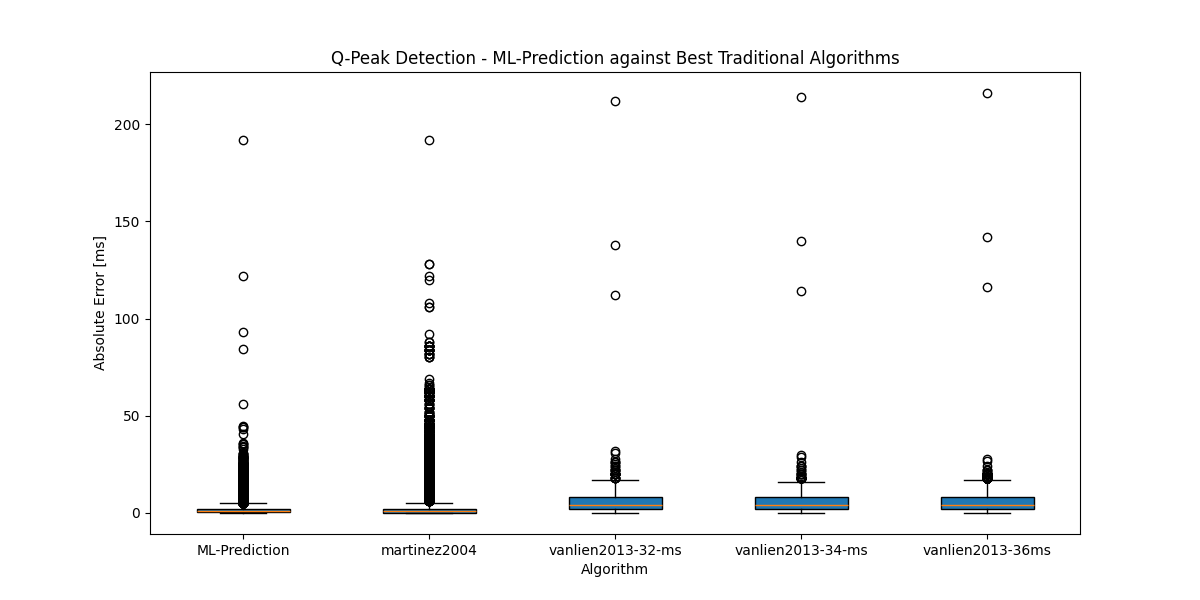

In [48]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("Q-Peak Detection - ML-Prediction against Best Traditional Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Absolute Error [ms]")
plt.show()

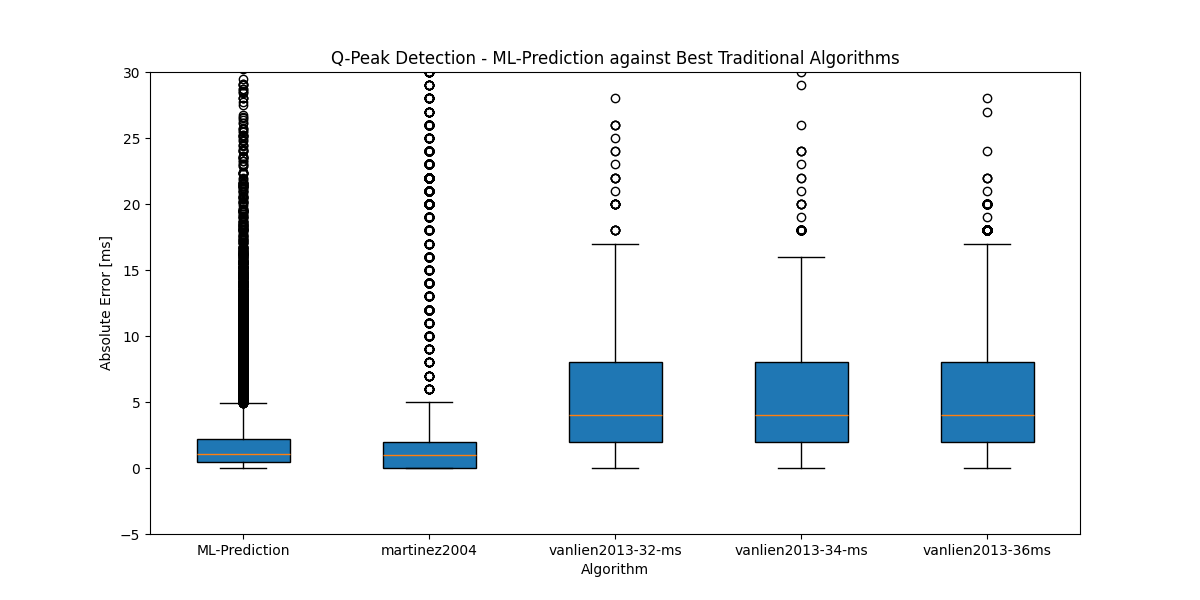

In [49]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("Q-Peak Detection - ML-Prediction against Best Traditional Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Absolute Error [ms]")
plt.ylim(-5, 30)
plt.show()

### Boxplot of the errors of the best performing algorithms against the reference data

In [50]:
data = [error_empkins["martinez2004"], error_empkins["forounzafar2018"], error_guardian["vanlien2013-32-ms"], error_guardian["vanlien2013-34-ms"],error_guardian["vanlien2013-36-ms"], error_guardian["vanlien2013-38-ms"], error_guardian["vanlien2013-40-ms"], error_guardian["vanlien2013-42-ms"]]
labels = ["martinez2004", "forounzafar2018", "vanlien2013-32-ms", "vanlien2013-34-ms", "vanlien2013-36-ms", "vanlien2013-38-ms","vanlien2013-40-ms", "vanlien2013-42-ms"]

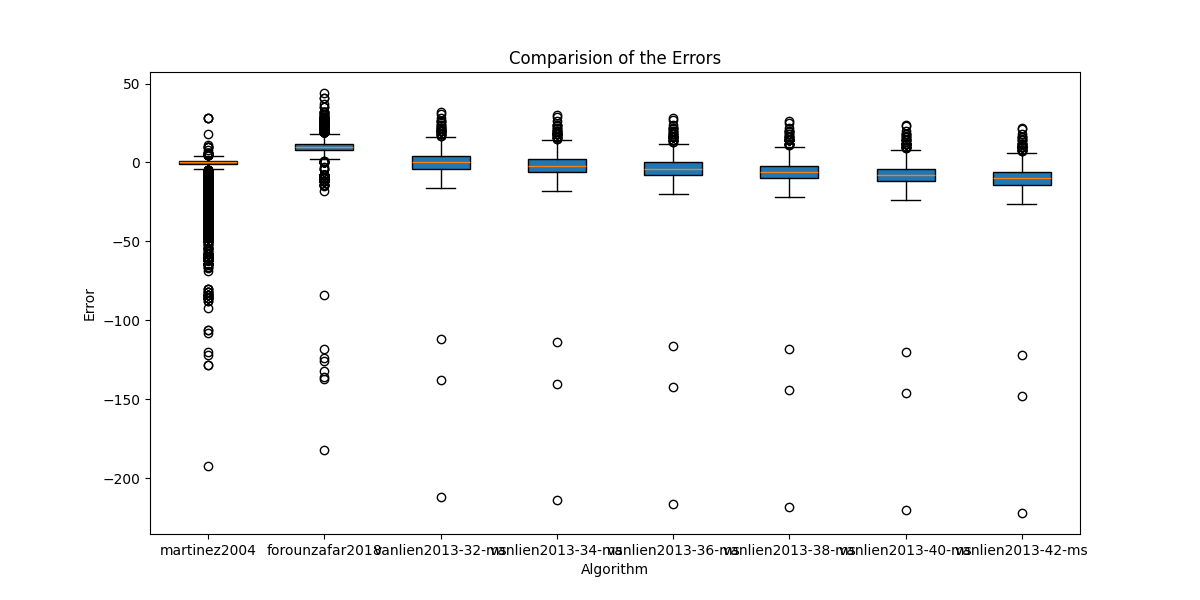

In [51]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("Comparision of the Errors")
plt.xlabel("Algorithm")
plt.ylabel("Error")
plt.show()

In [52]:
data = [error_empkins["martinez2004"], error_empkins["forounzafar2018"]]
labels = ["martinez2004", "forounzafar2018"]

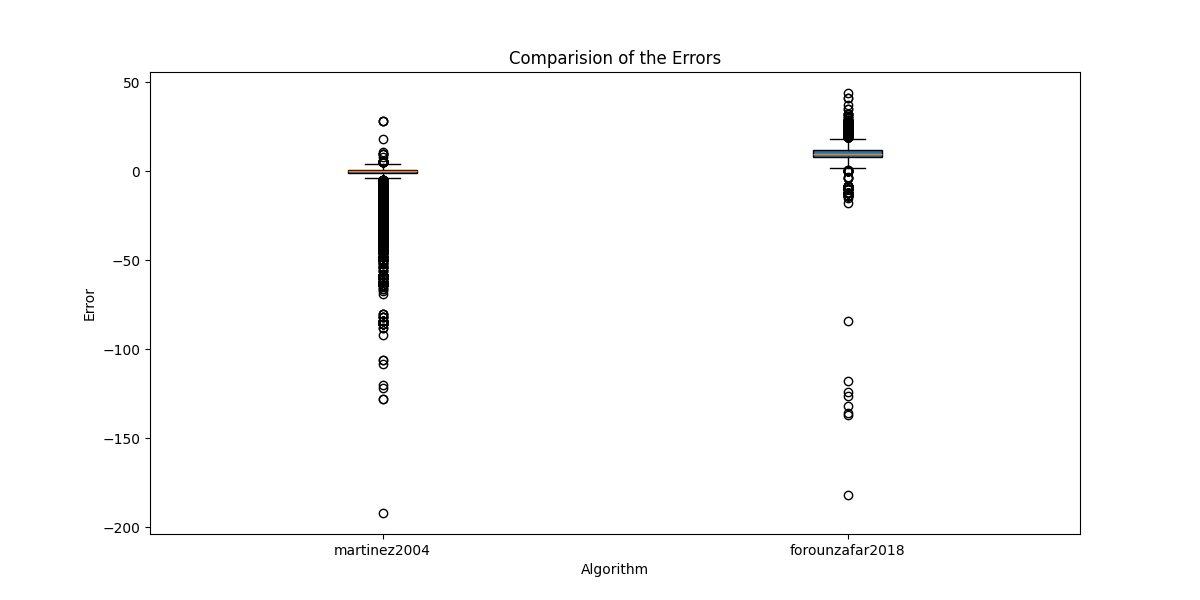

In [53]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("Comparision of the Errors")
plt.xlabel("Algorithm")
plt.ylabel("Error")
plt.show()

### Residualplot of the ML-Prediction against the reference data

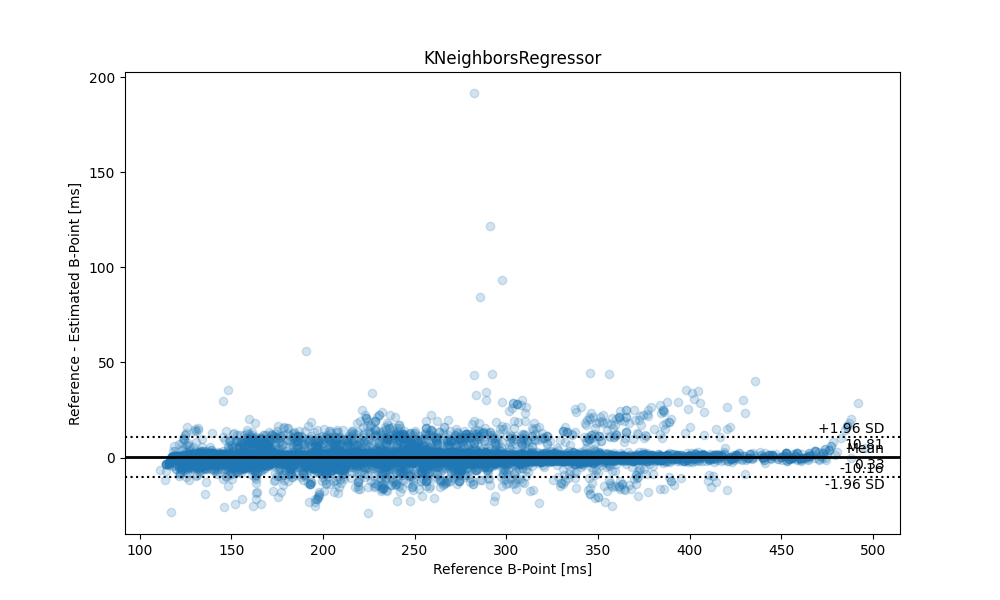

In [54]:
plt.figure(figsize=(10, 6))
pg.plot_blandaltman(best_algo["true_labels"].values[0], best_algo["predicted_labels"].values[0], alpha=0.2)
plt.title("KNeighborsRegressor")
plt.xlabel("Reference B-Point [ms]")
plt.ylabel("Reference - Estimated B-Point [ms]")
plt.show()

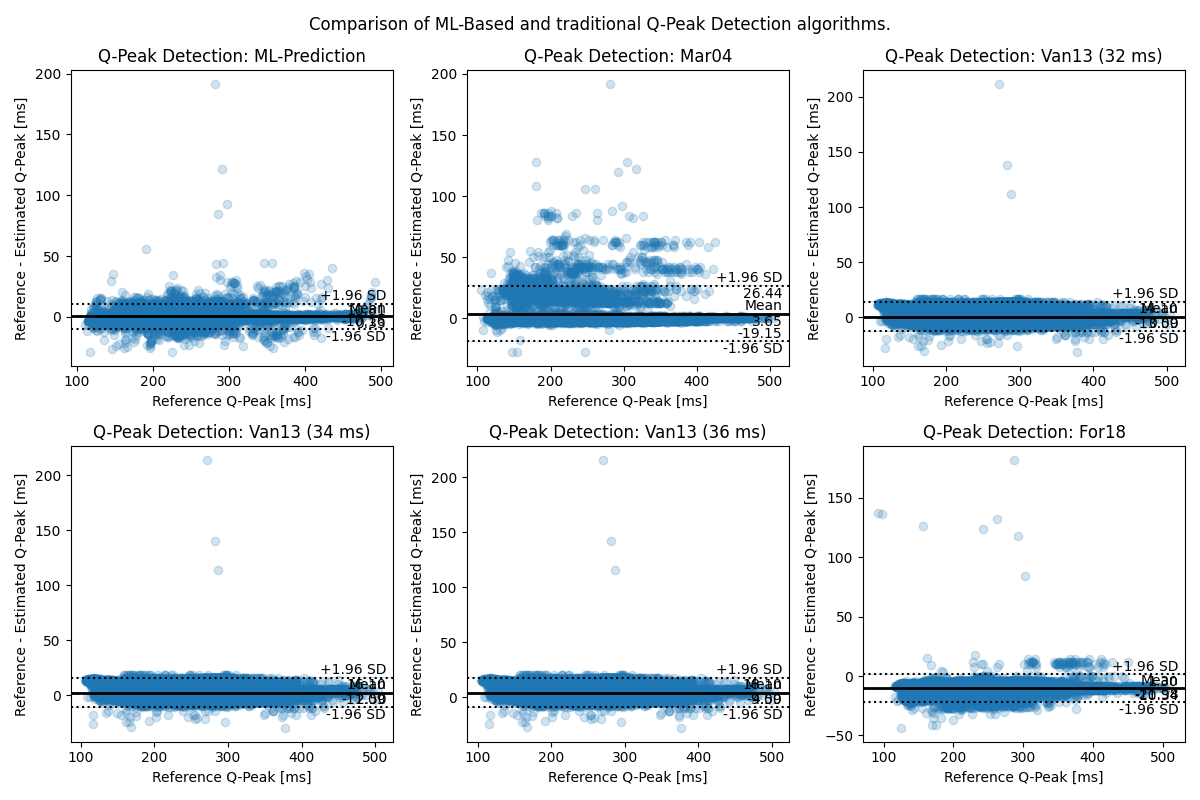

In [55]:
# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plot Bland-Altman plots
pg.plot_blandaltman(best_algo["true_labels"].values[0], best_algo["predicted_labels"].values[0], ax=axes[0, 0], alpha=0.2)
axes[0, 0].set_title("Q-Peak Detection: ML-Prediction")
axes[0, 0].set_xlabel("Reference Q-Peak [ms]")
axes[0, 0].set_ylabel("Reference - Estimated Q-Peak [ms]")

pg.plot_blandaltman(data_best_algos_empkins['q_wave_onset_sample_reference'], data_best_algos_empkins['martinez2004'], ax=axes[0, 1], alpha=0.2)
axes[0, 1].set_title("Q-Peak Detection: Mar04")
axes[0, 1].set_xlabel("Reference Q-Peak [ms]")
axes[0, 1].set_ylabel("Reference - Estimated Q-Peak [ms]")

pg.plot_blandaltman(data_best_algos_empkins['q_wave_onset_sample_reference'], data_best_algos_empkins['vanlien2013-32-ms'], ax=axes[0, 2], alpha=0.2)
axes[0, 2].set_title("Q-Peak Detection: Van13 (32 ms)")
axes[0, 2].set_xlabel("Reference Q-Peak [ms]")
axes[0, 2].set_ylabel("Reference - Estimated Q-Peak [ms]")

pg.plot_blandaltman(data_best_algos_empkins['q_wave_onset_sample_reference'], data_best_algos_empkins['vanlien2013-34-ms'], ax=axes[1, 0], alpha=0.2)
axes[1, 0].set_title("Q-Peak Detection: Van13 (34 ms)")
axes[1, 0].set_xlabel("Reference Q-Peak [ms]")
axes[1, 0].set_ylabel("Reference - Estimated Q-Peak [ms]")

pg.plot_blandaltman(data_best_algos_empkins['q_wave_onset_sample_reference'], data_best_algos_guardian['vanlien2013-36-ms'], ax=axes[1, 1], alpha=0.2)
axes[1, 1].set_title("Q-Peak Detection: Van13 (36 ms)")
axes[1, 1].set_xlabel("Reference Q-Peak [ms]")
axes[1, 1].set_ylabel("Reference - Estimated Q-Peak [ms]")

pg.plot_blandaltman(data_best_algos_empkins['q_wave_onset_sample_reference'], data_best_algos_guardian['forounzafar2018'], ax=axes[1, 2], alpha=0.2)
axes[1, 2].set_title("Q-Peak Detection: For18")
axes[1, 2].set_xlabel("Reference Q-Peak [ms]")
axes[1, 2].set_ylabel("Reference - Estimated Q-Peak [ms]")

fig.suptitle("Comparison of ML-Based and traditional Q-Peak Detection algorithms.")
plt.tight_layout()
plt.show()